In [1]:
import os
import librosa

In [2]:
mylist = os.listdir('Raw_Data/')

In [3]:
type(mylist)

list

In [4]:
print(mylist[20])

03-01-01-01-01-01-22.wav


In [5]:
actor1_List = os.listdir('Raw_Data/Actor_01')

In [6]:
print(actor1_List[0])

03-01-01-01-01-01-01.wav


In [7]:
print(actor1_List[0][6:-16])

01


In [8]:
data,sampling_rate = librosa.load('Raw_Data/AudioData/DC/a08.wav')

Populating the interactive namespace from numpy and matplotlib


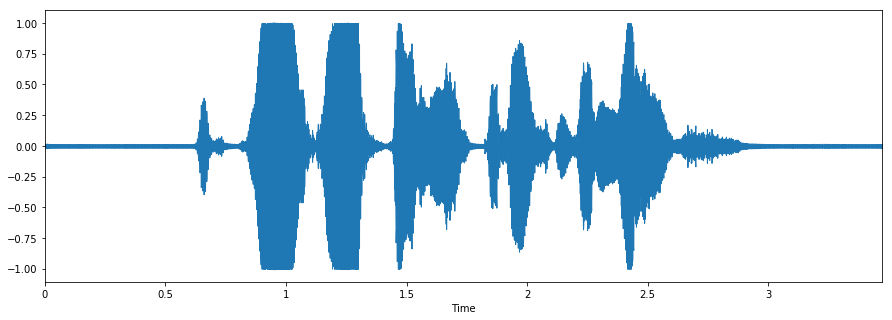

In [9]:
%pylab inline
import os
import pandas as pd
import matplotlib.pyplot as plt
import librosa
import librosa.display
import glob

plt.figure(figsize=(15,5))
librosa.display.waveplot(data,sr=sampling_rate)

nn is range(1323, 153158, 441)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


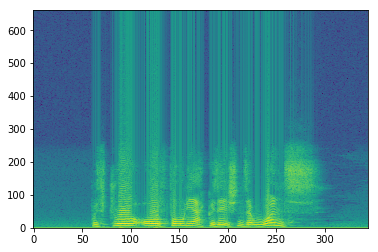

In [10]:
import matplotlib.pyplot as plt
import scipy.io.wavfile
import numpy as np
import sys


sr,x = scipy.io.wavfile.read('Raw_Data/AudioData/DC/a08.wav')

# sr x
#print(sr,x,len(x))

## Parameters : 10ms step 30ms window
nstep = int(sr * 0.01)
nwin = int(sr * 0.03)
nfft = nwin

# >>> np.hamming(12)
# array([ 0.08      ,  0.15302337,  0.34890909,  0.60546483,  0.84123594,
#         0.98136677,  0.98136677,  0.84123594,  0.60546483,  0.34890909,
#         0.15302337,  0.08      ])
# 返回指定长度的余弦函数 最大值1 最小值0
window = np.hamming(nwin) #hamming窗口 截取语音片段 并形成余弦函数 只有（0，pi）区间有值 其他区间为0

nn = range(nwin,len(x), nstep)
print('nn is {0}'.format(nn))

X = np.zeros((len(nn),nfft//2))# //为整除
print(X)

#滑动窗口
for i,n in enumerate(nn):
    #print(n,nwin)
    xseg = x[(n-nwin):n] #长度为nwin的序列
    #print(xseg)
    #print(window)
    #print(window*xseg)
    # window * xseg 就是单纯的相乘 从而将xseg序列映射在hanming窗口的余弦函数上
    z = np.fft.fft(window * xseg,nfft) # 进行hamming窗中数据的快速傅里叶转换
    X[i,:] = np.log(np.abs(z[:nfft//2])) # 截取其中一半
    
plt.imshow(X.T,interpolation='nearest',origin='lower',aspect='auto') # T为转置

plt.show()

In [11]:
feeling_list=[]
for item in mylist:
    if item[6:-16]=='02' and int(item[18:-4])%2==0:
        feeling_list.append('female_calm')
    elif item[6:-16]=='02' and int(item[18:-4])%2==1:
        feeling_list.append('male_calm')
    elif item[6:-16]=='03' and int(item[18:-4])%2==0:
        feeling_list.append('female_happy')
    elif item[6:-16]=='03' and int(item[18:-4])%2==1:
        feeling_list.append('male_happy')
    elif item[6:-16]=='04' and int(item[18:-4])%2==0:
        feeling_list.append('female_sad')
    elif item[6:-16]=='04' and int(item[18:-4])%2==1:
        feeling_list.append('male_sad')
    elif item[6:-16]=='05' and int(item[18:-4])%2==0:
        feeling_list.append('female_angry')
    elif item[6:-16]=='05' and int(item[18:-4])%2==1:
        feeling_list.append('male_angry')
    elif item[6:-16]=='06' and int(item[18:-4])%2==0:
        feeling_list.append('female_fearful')
    elif item[6:-16]=='06' and int(item[18:-4])%2==1:
        feeling_list.append('male_fearful')
    elif item[:1]=='a':
        feeling_list.append('male_angry')
#     elif item[:1]=='d':
#         feeling_list.append('male_disgust')
    elif item[:1]=='f':
        feeling_list.append('male_fearful')
    elif item[:1]=='h':
        feeling_list.append('male_happy')
#     elif item[:1]=='n':
#         feeling_list.append('male_calm')
    elif item[:2]=='sa':
        feeling_list.append('male_sad')
#     elif item[:2]=='su':
#         feeling_list.append('male_surprise')

In [12]:
labels = pd.DataFrame(feeling_list)
labels[:10]

,0
0,male_calm
1,female_calm
2,male_calm
3,female_calm
4,male_calm
5,female_calm
6,male_calm
7,male_calm
8,female_calm
9,male_calm


In [13]:
df = pd.DataFrame(columns=['feature'])
bookmark=0
for index,y in enumerate(mylist):
    # 排除一些数据 比如第二个数据集中的惊讶 中性 疲惫表情
    if (mylist[index][:1]!='A' and
    mylist[index][6:-16]!='01' and mylist[index][6:-16]!='07'
    and mylist[index][6:-16]!='08' and mylist[index][:2]!='su'
    and mylist[index][:1]!='n' and mylist[index][:1]!='d'):
        X, sample_rate = librosa.load('Raw_Data/'+y, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)
        sample_rate = np.array(sample_rate)
        # 抽取mfcc特征
        mfccs = np.mean(librosa.feature.mfcc(y=X, 
                                            sr=sample_rate, 
                                            n_mfcc=13),axis=0)
        feature = mfccs
        #[float(i) for i in feature]
        #feature1=feature[:135]
        df.loc[bookmark] = [feature]
        bookmark=bookmark+1

In [14]:
df[:5]

,feature
0,"[-73.03060130615042, -72.72179580419063, -72.4..."
1,"[-69.90065507218834, -69.90065507218834, -69.9..."
2,"[-65.89476644587715, -64.20523551389778, -58.1..."
3,"[-59.7657614063152, -59.40064093532404, -59.62..."
4,"[-46.317756408977466, -48.047395835591345, -51..."


In [15]:
df3 = pd.DataFrame(df['feature'].values.tolist())
df3[:5]
df3.columns.values.tolist()

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [16]:
newdf = pd.concat([df3,labels],axis=1)
# rename失败 大概是因为有两个同为0的列
rnewdf = newdf.rename(index = str,columns={"0":"label"})

In [17]:
rnewdf.columns.values.tolist()

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [18]:
from sklearn.utils import shuffle
rnewdf = shuffle(newdf)
rnewdf[:10]

,0,1,2,3,4,5,6,7,8,9,...,207,208,209,210,211,212,213,214,215,0
365,-41.220757,-41.220757,-41.134965,-41.220757,-41.220757,-41.220757,-41.220757,-41.220757,-40.736540,-41.220757,...,-31.994341,-35.412187,-34.892232,-32.714176,-34.465919,-34.465228,-35.939717,-31.809280,-25.293328,female_happy
487,-53.999258,-53.999258,-53.999258,-53.999258,-53.999258,-53.999258,-53.999258,-53.999258,-53.999258,-53.999258,...,-25.551069,-26.592139,-27.040045,-26.779288,-26.431815,-24.489274,-23.881089,-19.746701,-14.540212,male_sad
20,-64.247620,-64.373116,-63.817062,-60.828506,-58.402493,-51.610943,-51.796620,-52.992585,-54.142099,-52.943971,...,-47.849436,-48.964547,-48.379615,-47.041026,-46.480041,-46.190387,-46.501645,-46.433923,-47.593557,male_calm
883,-42.857392,-40.275680,-40.181031,-40.028477,-41.299370,-40.615974,-38.716585,-37.227968,-36.882041,-37.313021,...,-47.782886,-48.033005,-48.330319,-48.191405,-49.559215,-49.631744,-49.046684,-48.784786,-48.677354,male_fearful
637,-53.054884,-53.054884,-53.054884,-53.054884,-53.054884,-53.054884,-53.054884,-53.054884,-53.054884,-53.054884,...,-50.203255,-49.621696,-52.275230,-51.447833,-51.883657,-52.533490,-50.991376,-48.410666,-47.317401,female_angry
992,6.365170,3.497640,-7.889239,-8.447703,-8.561251,-8.730269,-8.502048,-8.234748,-7.009630,-6.454813,...,-11.853946,-10.748600,-9.803390,-10.013067,-11.042821,-12.163002,-11.963912,-3.735479,0.526028,male_happy
711,-41.509461,-41.211575,-41.279704,-41.039260,-41.261332,-41.949941,-41.279236,-40.551988,-40.417156,-40.504051,...,-32.731705,-32.707707,-31.940661,-32.185532,-33.970321,-34.747504,-34.679142,-34.679380,-36.013277,male_angry
265,-62.430162,-61.890209,-59.801767,-60.353930,-60.058773,-60.072021,-60.970773,-62.690823,-62.405864,-62.465799,...,-54.385944,-55.304028,-58.207417,-58.249243,-58.344151,-57.103423,-57.147382,-59.231643,-63.969559,male_happy
474,-49.958574,-46.473401,-44.549356,-44.201441,-45.861099,-46.020408,-46.097946,-47.309275,-47.511821,-45.751704,...,-33.903262,-33.253502,-35.381565,-37.056474,-35.464149,-35.422790,-39.478002,-42.144597,-42.882220,male_sad
995,-23.211082,-21.155930,-12.050489,-9.850842,-6.516490,-5.985075,-3.722038,-2.841671,-4.009259,-3.378478,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,male_happy


In [19]:
rnewdf = rnewdf.fillna(0)

In [20]:
newdf1 = np.random.rand(len(rnewdf))<0.8
print(newdf1)
train = rnewdf[newdf1]
test = rnewdf[~newdf1]

[ True  True  True ...  True  True  True]


In [21]:
train[250:260]

,0,1,2,3,4,5,6,7,8,9,...,207,208,209,210,211,212,213,214,215,0
449,-59.096757,-59.096757,-59.096757,-59.096757,-59.096757,-59.096757,-59.096757,-59.096757,-59.096757,-59.096757,...,-57.467817,-58.194116,-58.475159,-58.665910,-59.033060,-59.098067,-57.585303,-57.309299,-58.698590,female_sad
316,-54.984663,-54.995117,-54.342690,-52.428592,-51.938586,-50.741923,-49.396346,-48.488101,-44.661726,-41.272555,...,-50.355849,-49.583556,-49.774373,-49.891491,-48.274491,-46.648813,-47.408262,-20.616111,-12.186651,female_happy
629,-56.436445,-56.135846,-56.301107,-54.998689,-54.010960,-53.162091,-53.277139,-55.061737,-57.547560,-57.369747,...,-41.040692,-41.081417,-40.020502,-41.913939,-42.328845,-43.582864,-42.888286,-42.983297,-45.469439,male_angry
505,-63.762622,-63.762622,-63.762622,-63.762622,-63.762622,-63.762622,-63.762622,-63.762622,-63.762622,-63.762622,...,-54.037927,-55.676996,-56.243666,-58.995238,-55.480520,-54.128798,-54.816523,-53.606772,-49.327083,female_sad
599,-47.580376,-47.580376,-47.580376,-47.580376,-47.580376,-47.580376,-47.580376,-47.580376,-47.580376,-47.580376,...,-17.349710,-17.208624,-17.796563,-17.936725,-17.350310,-17.991303,-18.088496,-19.601585,-19.350534,male_angry
272,-58.416270,-58.416270,-58.416270,-57.573445,-57.402440,-58.283530,-59.001954,-55.797078,-58.000678,-56.934552,...,-35.375331,-36.822361,-40.088500,-37.593660,-38.732343,-40.107168,-41.780195,-41.634849,-42.437048,male_happy
336,-51.821971,-54.558968,-54.594201,-54.274560,-54.368980,-54.870322,-55.241071,-54.999387,-55.256221,-56.148395,...,-24.167172,-25.164312,-26.231609,-25.638438,-24.241284,-24.341445,-24.899202,-21.364258,-15.935068,male_happy
993,-16.663628,-9.444955,-5.214609,-4.176872,-4.184506,-4.682254,-6.062408,-8.288901,-10.036607,-10.798955,...,-3.615578,-5.169280,-5.411049,-6.561164,-9.601699,-13.454450,-16.269465,-18.959629,-22.619120,male_happy
658,-55.490920,-54.413760,-52.647229,-51.409487,-52.615997,-50.656469,-49.831283,-50.206940,-50.343438,-49.998324,...,-33.229618,-32.631736,-31.708020,-31.251413,-32.065469,-31.903136,-31.957088,-29.079692,-25.029768,female_angry
53,-65.191591,-65.191591,-65.191591,-65.191591,-65.191591,-65.191591,-65.191591,-65.191591,-65.191591,-65.191591,...,-47.884927,-47.278918,-48.261564,-47.216817,-44.945268,-45.441331,-47.107608,-52.104264,-54.900392,female_calm


In [22]:
trainfeatures = train.iloc[:,:-1]#去掉最后一列

In [23]:
print(trainfeatures)

            0          1          2          3          4          5    \
365  -41.220757 -41.220757 -41.134965 -41.220757 -41.220757 -41.220757   
487  -53.999258 -53.999258 -53.999258 -53.999258 -53.999258 -53.999258   
20   -64.247620 -64.373116 -63.817062 -60.828506 -58.402493 -51.610943   
883  -42.857392 -40.275680 -40.181031 -40.028477 -41.299370 -40.615974   
637  -53.054884 -53.054884 -53.054884 -53.054884 -53.054884 -53.054884   
992    6.365170   3.497640  -7.889239  -8.447703  -8.561251  -8.730269   
711  -41.509461 -41.211575 -41.279704 -41.039260 -41.261332 -41.949941   
474  -49.958574 -46.473401 -44.549356 -44.201441 -45.861099 -46.020408   
995  -23.211082 -21.155930 -12.050489  -9.850842  -6.516490  -5.985075   
11   -62.364311 -59.934725 -61.869600 -67.495764 -71.071811 -65.679826   
409  -54.099932 -51.167973 -49.884015 -48.927846 -49.139315 -53.261917   
1004 -24.097256 -24.047160 -24.009617 -24.403762 -24.113488 -24.205047   
927  -46.300563 -46.300563 -46.300563 

In [24]:
trainlabel = train.iloc[:,-1:]# [-1:]可以保留列名
print(trainlabel)

                   0
365     female_happy
487         male_sad
20         male_calm
883     male_fearful
637     female_angry
992       male_happy
711       male_angry
474         male_sad
995       male_happy
11         male_calm
409       female_sad
1004        male_sad
927   female_fearful
239       male_happy
758     female_angry
744     female_angry
45       female_calm
121        male_calm
341       male_happy
166        male_calm
274       male_happy
16         male_calm
792     male_fearful
83       female_calm
440         male_sad
310       male_happy
118      female_calm
826   female_fearful
517         male_sad
809   female_fearful
...              ...
595       male_angry
179        male_calm
256     female_happy
544       female_sad
772   female_fearful
75       female_calm
76         male_calm
445       female_sad
714     female_angry
164        male_calm
991       male_happy
455         male_sad
69         male_calm
384         male_sad
943     male_fearful
279     femal

In [25]:
testfeatures = test.iloc[:, :-1]

In [26]:
testlabel = test.iloc[:, -1:]

In [29]:
import keras
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder

X_train = np.array(trainfeatures)
y_train = np.array(trainlabel)
X_test = np.array(testfeatures)
y_test = np.array(testlabel)

lb = LabelEncoder()
# one hot
y_train = np_utils.to_categorical(lb.fit_transform(y_train))
y_test = np_utils.to_categorical(lb.fit_transform(y_test))

Using TensorFlow backend.
/home/mike/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
/home/mike/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [30]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [31]:
y_train.shape

(818, 10)

In [32]:
X_train.shape

(818, 216)

In [33]:
print('Pad sequences')
x_traincnn = np.expand_dims(X_train,axis=2)
x_testcnn = np.expand_dims(X_test,axis=2)

Pad sequences


In [34]:
import keras
from keras.models import Sequential
from keras.layers import Conv1D,MaxPooling1D,Dense,Input,Flatten,Dropout,Activation
model = Sequential()

model.add(Conv1D(128, 5,padding='same',
                 input_shape=(216,1)))
model.add(Activation('relu'))
model.add(Conv1D(128, 5,padding='same'))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(10))
model.add(Activation('softmax'))
opt = keras.optimizers.rmsprop(lr=0.00001, decay=1e-6)

In [35]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 216, 128)          768       
_________________________________________________________________
activation_1 (Activation)    (None, 216, 128)          0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 216, 128)          82048     
_________________________________________________________________
activation_2 (Activation)    (None, 216, 128)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 216, 128)          0         
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 27, 128)           0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 27, 128)           82048     
__________

In [36]:
model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])

In [37]:
cnnhistory=model.fit(x_traincnn,y_train,batch_size=32,epochs=1009,validation_data=(x_testcnn,y_test))

Train on 818 samples, validate on 202 samples
Epoch 1/1009
818/818 [==============================] - 1s - loss: 2.3026 - acc: 0.0929 - val_loss: 2.3026 - val_acc: 0.1287
Epoch 2/1009
818/818 [==============================] - 1s - loss: 2.3026 - acc: 0.1076 - val_loss: 2.3026 - val_acc: 0.0842
Epoch 3/1009
818/818 [==============================] - 1s - loss: 2.3026 - acc: 0.1149 - val_loss: 2.3026 - val_acc: 0.0842
Epoch 4/1009
818/818 [==============================] - 1s - loss: 2.3025 - acc: 0.1125 - val_loss: 2.3025 - val_acc: 0.0842
Epoch 5/1009
818/818 [==============================] - 1s - loss: 2.3025 - acc: 0.1357 - val_loss: 2.3025 - val_acc: 0.1287
Epoch 6/1009
818/818 [==============================] - 1s - loss: 2.3024 - acc: 0.1284 - val_loss: 2.3024 - val_acc: 0.1040
Epoch 7/1009
818/818 [==============================] - 1s - loss: 2.3022 - acc: 0.1333 - val_loss: 2.3022 - val_acc: 0.0891
Epoch 8/1009
818/818 [==============================] - 1s - loss: 2.3020 - acc

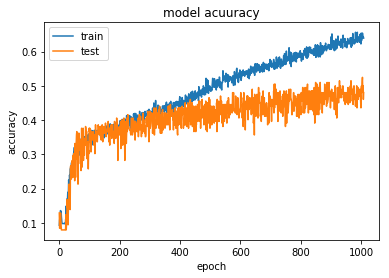

In [38]:
import matplotlib.pyplot as plt
plt.plot(cnnhistory.history['acc'])
plt.plot(cnnhistory.history['val_acc'])
plt.title('model acuuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

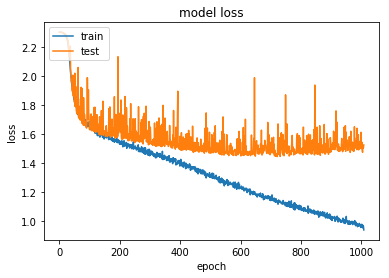

In [39]:
import matplotlib.pyplot as plt
plt.plot(cnnhistory.history['loss'])
plt.plot(cnnhistory.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

## Saving model

In [40]:
model_name = 'Emotion_Voice_Ditection_Model.h5'
save_dir = os.path.join(os.getcwd(),'saved_models')

#Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir,model_name)
model.save(model_path)
print('saved trained model at %s' % model_path)

saved trained model at /mnt/D/fanmingke/project/Emotion-Audio/Emotion-Audio/saved_models/Emotion_Voice_Ditection_Model.h5


## Predicting emotions on the test data

In [41]:
preds = model.predict(x_testcnn,batch_size=32,verbose=1)

128/202 [==================>...........] - ETA: 0s

In [42]:
preds1 = preds.argmax(axis=1)
preds1

array([9, 6, 2, 5, 6, 2, 5, 1, 7, 9, 5, 4, 2, 5, 1, 5, 5, 2, 1, 9, 1, 0,
       3, 8, 8, 5, 0, 8, 2, 8, 9, 5, 5, 4, 7, 0, 3, 1, 2, 3, 1, 7, 9, 3,
       5, 4, 1, 9, 7, 2, 7, 4, 0, 4, 3, 0, 5, 1, 1, 5, 7, 1, 9, 9, 8, 7,
       7, 0, 2, 3, 2, 9, 7, 7, 5, 7, 7, 9, 5, 0, 2, 5, 0, 9, 1, 2, 2, 2,
       0, 5, 0, 9, 5, 8, 0, 5, 0, 5, 4, 1, 0, 7, 7, 7, 5, 9, 3, 6, 5, 2,
       9, 9, 5, 9, 9, 6, 9, 2, 2, 6, 1, 5, 1, 1, 4, 2, 3, 3, 4, 8, 7, 2,
       7, 6, 7, 5, 5, 4, 9, 0, 2, 1, 7, 4, 9, 9, 8, 9, 3, 1, 3, 6, 0, 7,
       0, 2, 6, 3, 0, 2, 6, 0, 2, 3, 3, 5, 3, 1, 0, 5, 4, 4, 2, 6, 9, 6,
       1, 6, 8, 1, 3, 3, 9, 1, 5, 1, 3, 1, 8, 1, 1, 9, 1, 9, 2, 4, 1, 5,
       2, 7, 3, 7])

In [43]:
abc = preds1.astype(int).flatten()

In [44]:
predictions = (lb.inverse_transform((abc)))

/home/mike/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [45]:
preddf = pd.DataFrame({'predictedvalues':predictions})
preddf[:10]

,predictedvalues
0,male_sad
1,male_calm
2,female_fearful
3,male_angry
4,male_calm
5,female_fearful
6,male_angry
7,female_calm
8,male_fearful
9,male_sad


In [46]:
actual=y_test.argmax(axis=1)
abc123 = actual.astype(int).flatten()
actualvalues = (lb.inverse_transform((abc123)))

/home/mike/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [47]:
actualdf = pd.DataFrame({'actualvalues':actualvalues})
actualdf[:10]

,actualvalues
0,male_happy
1,male_calm
2,female_happy
3,male_angry
4,male_calm
5,female_angry
6,male_happy
7,female_calm
8,male_fearful
9,male_calm


In [48]:
finaldf = actualdf.join(preddf)

## Actual vs Predicted emotions

In [49]:
finaldf[170:180]

,actualvalues,predictedvalues
170,female_angry,female_sad
171,female_sad,female_sad
172,female_fearful,female_fearful
173,male_sad,male_calm
174,male_fearful,male_sad
175,male_calm,male_calm
176,male_calm,female_calm
177,male_calm,male_calm
178,female_angry,male_happy
179,female_sad,female_calm


In [50]:
finaldf.groupby('actualvalues').count()

,predictedvalues
actualvalues,
female_angry,22
female_calm,19
female_fearful,20
female_happy,22
female_sad,16
male_angry,26
male_calm,19
male_fearful,16
male_happy,25


In [51]:
finaldf.groupby('predictedvalues').count()

,actualvalues
predictedvalues,
female_angry,19
female_calm,27
female_fearful,25
female_happy,19
female_sad,13
male_angry,29
male_calm,12
male_fearful,22
male_happy,10


In [52]:
finaldf.to_csv('Predictions.csv',index=False)